## Equalização de histograma

Seja $n_k$ o número de pixels na imagem possuindo o $k$-ésimo nível de intensidade (por exemplo, o primeiro nível com valor 0, o segundo com valor 1, e assim por diante), a transformação de equalização de histograma é dada por

\begin{equation}
s_k = T(k) = \frac{L-1}{MN}\sum_{j=0}^{k}n_j
\end{equation}
onde $s_k$ é o $k$-ésimo nível de intensidade após a transformação, $L$ o número de níveis de intensidade na imagem e $N$ e $M$ o número de linhas e colunas da imagem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def histogram_equalization(img):
    bins = range(0, 257)
    hist, _ = np.histogram(img, bins)    # Calcula quantos pixels possuem cada nível de intensidade

    # Calcula a transformação para cada nível de intensidade
    mn = sum(hist)
    c = 255./mn                           # O valor de (L-1)/MN
    out_intensity = np.zeros(256)
    for k in range(256):
        soma = 0
        for j in range(0, k+1):
            soma += hist[j]
        out_intensity[k] = c*soma
    
    # Aplica a transformação
    img_eq = np.zeros(img.shape)
    num_rows, num_cols = img.shape
    for row in range(num_rows):
        for col in range(num_cols):
            img_eq[row, col] = out_intensity[img[row, col]]
    
    return img_eq

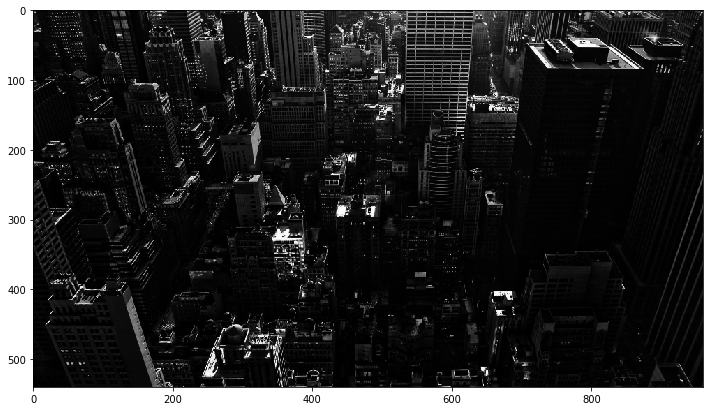

In [2]:
img = plt.imread('city_dark.tiff')
plt.figure(figsize=[12,12])
plt.imshow(img, 'gray')

Text(0,0.5,'Number of pixels')

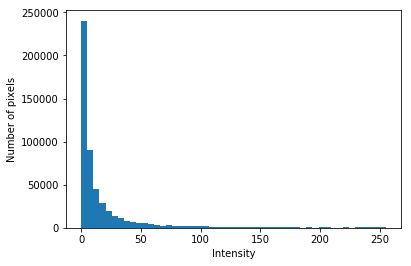

In [3]:
plt.hist(img.flatten(), bins=50)
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')

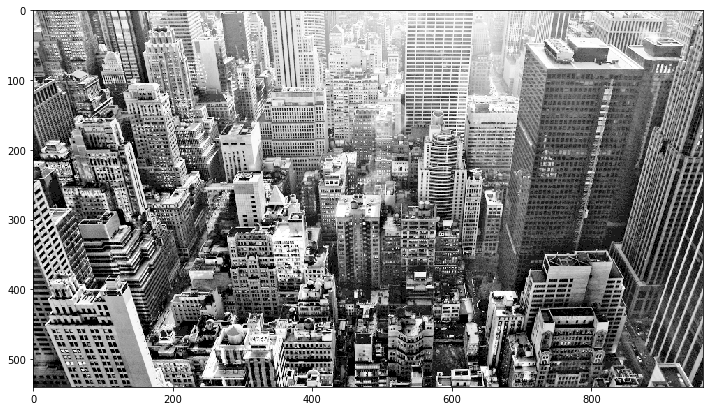

In [4]:
img_eq = histogram_equalization(img)        
plt.figure(figsize=[12,12])
plt.imshow(img_eq, 'gray')

Text(0,0.5,'Number of pixels')

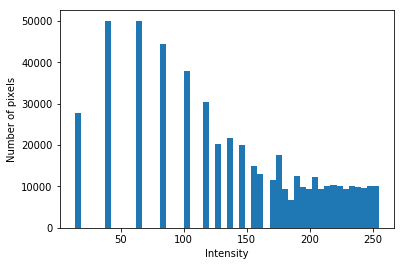

In [5]:
plt.hist(img_eq.flatten(), bins=50)
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')